In [2]:
import pandas as pd  #For Data manipulation
import numpy as np   #For linear algebra and mathematical manipulations

#For plotting
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline

#For Splitting train and test models

from sklearn.model_selection import train_test_split 

#For generating a profile report of the data
import pandas_profiling as pd_prof

#For encoding the categorical variable
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#For normalizing the data
from sklearn.preprocessing import StandardScaler

#For creating a machine learning classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

#For performance evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc

#To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

## LOAD THE DATASET 

In [3]:
titanic_train= pd.read_csv('C:\\Users\\Administrator\\Downloads\\train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test = pd.read_csv('C:\\Users\\Administrator\\Downloads\\test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## DATA CLEANING, ANALYSIS, & VISUALIZATION

- CONCAT TRAIN AND TEST DATASET

In [5]:
all_data = pd.concat([titanic_train,titanic_test],sort=True).reset_index(drop=True)

- PERFORM BASIC ANALYSIS TO UNDERSTAND THE DATA


In [6]:
all_data.shape

(1309, 12)

In [7]:
all_data.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


In [8]:
all_data.tail(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668



##### df_train,df_test =  all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

- CHECKING FOR  NULL VALUES IN THE DATA

In [9]:
all_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

- MISSING VALUES IN AGE COLUMN
- Here we are grouping by sex and pclass and taking the median age (you can take mean also,
  but median is mostly prefered)

In [10]:
all_data['Age'] = all_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

- MISSING VALUES FOR EMBARKED COLUMN
- Since the ticket number for both rows are same,we assume they embarked from the same place
- Groupby sex,pclass,count the embarked for each group,use the value with maximum count of 
embark in that particular class and sex

In [12]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [13]:
all_data.groupby(['Sex','Pclass','Embarked'])['Embarked'].count()

Sex     Pclass  Embarked
female  1       C            71
                Q             2
                S            69
        2       C            11
                Q             2
                S            93
        3       C            31
                Q            56
                S           129
male    1       C            70
                Q             1
                S           108
        2       C            17
                Q             5
                S           149
        3       C            70
                Q            57
                S           366
Name: Embarked, dtype: int64

- As you can see, in both rows,the ticket number is same,after grouping by we could see,for pclass =1
    embark = C ,the count was higher. Hence we fill it with 'C'

In [14]:
all_data['Embarked'].fillna('C',inplace=True)

- MISSING VALUES FOR FARE COLUMN

In [16]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [17]:
med_fare = all_data.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

In [18]:
all_data['Fare'].fillna(med_fare,inplace=True)

- MISSING VALUES FOR CABIN COLUMN
- Here,around 77% data is missing; making it highly impossible to impute values.
- But we cant just ignore the cabin column, since there could be probabilities of surviving depending
  upon the type of cabin
- Lets analyze the cabin based on the passenger class it belongs to.

In [28]:
all_data[all_data['Pclass']==1].groupby(['Cabin','Pclass'])['Pclass'].count().index  

MultiIndex(levels=[['A10', 'A11', 'A14', 'A16', 'A18', 'A19', 'A20', 'A21', 'A23', 'A24', 'A26', 'A29', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'A9', 'B10', 'B101', 'B102', 'B11', 'B18', 'B19', 'B20', 'B22', 'B24', 'B26', 'B28', 'B3', 'B30', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B45', 'B49', 'B5', 'B50', 'B51 B53 B55', 'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61', 'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C105', 'C106', 'C110', 'C111', 'C116', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128', 'C130', 'C132', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C28', 'C30', 'C31', 'C32', 'C39', 'C45', 'C46', 'C47', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C65', 'C68', 'C7', 'C70', 'C78', 'C80', 'C82', 'C83', 'C85', 'C86', 'C87', 'C89', 'C90', 'C91', 'C92', 'C93', 'C95', 'C97', 'C99', 'D10 D12', 'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D22', 'D26', 'D28', 'D30', 'D33', 'D34

In [29]:
all_data[all_data['Pclass']==2].groupby(['Cabin','Pclass'])['Pclass'].count().index  

MultiIndex(levels=[['D', 'D38', 'D56', 'E101', 'E77', 'F', 'F2', 'F33', 'F4'], [2]],
           codes=[[0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0]],
           names=['Cabin', 'Pclass'])

In [30]:
all_data[all_data['Pclass']==3].groupby(['Cabin','Pclass'])['Pclass'].count().index  

MultiIndex(levels=[['E10', 'E121', 'F E46', 'F E57', 'F E69', 'F G63', 'F G73', 'F38', 'G6'], [3]],
           codes=[[0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0]],
           names=['Cabin', 'Pclass'])

- Create a new column deck , extract meaningful information such as on which deck the cabin resides,
    the first letter of the cabin

In [31]:
all_data['Deck'] = all_data['Cabin'].apply(lambda x:x[0] if pd.notnull(x) else 'M')

- Remove the cabin from the data

In [35]:
all_data.drop(['Cabin'],axis=1,inplace=True)

In [36]:
all_data.isnull().sum() 

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Deck             0
dtype: int64

#### ANALYSIS ON DECK

In [37]:
all_data.groupby(['Deck','Pclass'])[['Deck']].count().transpose()

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Deck    22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

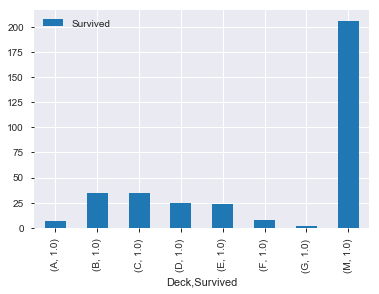

In [38]:
all_data[all_data['Survived']==1].groupby(['Deck','Survived'])[["Survived"]].count().plot(kind='bar')

- Based on the survival rate, group them accordingly

In [39]:
all_data['Deck'] = all_data['Deck'].replace(['A', 'B', 'C'], 'ABC')
all_data['Deck'] = all_data['Deck'].replace(['D','E'], 'DE')
all_data['Deck'] = all_data['Deck'].replace(['F', 'G'], 'FG')

In [40]:
# Passenger in the T deck is changed to A
idx = all_data[all_data['Deck'] == 'T'].index
all_data.loc[idx, 'Deck'] = 'A'

- Create a new column Ticket frequency to count the frequency of ticket

In [42]:
all_data['Ticket_Frequency'] = all_data.groupby(['Ticket'])['Ticket'].transform('count')

In [45]:
all_data.drop(['Ticket'],axis=1,inplace=True)

- Creating new features fr|om the Name column

In [46]:
all_data['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [62]:
all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [63]:
all_data['Title'] = all_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
all_data['Title'] = all_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [64]:
all_data['Title'].value_counts()

Mr                          757
Miss/Mrs/Ms                 465
Master                       61
Dr/Military/Noble/Clergy     26
Name: Title, dtype: int64

In [65]:
all_data.drop(['Name'],axis=1,inplace=True)

- Generating a profile report for the data

In [66]:
pd_prof.ProfileReport(all_data)

In [67]:
all_data.head(2)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Deck,Ticket_Frequency,Title
0,22.0,S,7.2500,0,1,3,male,1,0.0,M,1,Mr
1,38.0,C,71.2833,0,2,1,female,1,1.0,ABC,2,Miss/Mrs/Ms


### FOR CONTINUOUS DATA SUCH AS AGE AND FARE

In [68]:
all_data['Age'] = pd.qcut(all_data['Age'], 10)
all_data['Fare'] = pd.qcut(all_data['Fare'], 13)

In [70]:
all_data.head(2)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Deck,Ticket_Frequency,Title
0,"(21.0, 22.0]",S,"(-0.001, 7.25]",0,1,3,male,1,0.0,M,1,Mr
1,"(34.0, 40.0]",C,"(56.496, 83.475]",0,2,1,female,1,1.0,ABC,2,Miss/Mrs/Ms


### ENCODING AND NORMALIZATION OF DATA

In [72]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Age', 'Fare']

for feature in non_numeric_features:        
    all_data[feature] = LabelEncoder().fit_transform(all_data[feature])

In [73]:
all_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Deck,Ticket_Frequency,Title
0,2,2,0,0,1,3,1,1,0.0,4,1,3
1,7,0,11,0,2,1,0,1,1.0,1,2,2
2,4,2,3,0,3,3,0,0,1.0,4,1,2
3,7,2,10,0,4,1,0,1,1.0,1,2,2
4,7,2,3,0,5,3,1,0,0.0,4,1,3


In [80]:
all_data.drop(['PassengerId'],axis=1,inplace=True)

- SPLITTING THE ALL_DATA INTO TRAIN AND TEST DATA

In [81]:
df_train,df_test =  all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [82]:
print(df_test.shape,df_train.shape)

(418, 10) (891, 11)


In [83]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

In [84]:
print("Survived percentage is ",survived_per,"Not Survived Percentage is ",not_survived_per)

Survived percentage is  38.38383838383838 Not Survived Percentage is  61.61616161616161


In [85]:
X_train = StandardScaler().fit_transform(df_train.drop(['Survived'],axis=1))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 10)
y_train shape: (891,)
X_test shape: (418, 10)


In [87]:
df_train.corr()['Survived']

Age                -0.010063
Embarked           -0.174199
Fare                0.321206
Parch               0.081629
Pclass             -0.338481
Sex                -0.543351
SibSp              -0.035322
Survived            1.000000
Deck               -0.296292
Ticket_Frequency    0.064962
Title              -0.402510
Name: Survived, dtype: float64

### CREATE A MACHINE LEARNING MODEL USING RANDOM FOREST CLASSIFIER

In [89]:
rf = RandomForestClassifier(n_estimators=1100,random_state=3)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [92]:
y_pred

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [444]:
single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=3,
                                           n_jobs=-1,
                                           verbose=1)
leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 

In [448]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=final_data.drop(['Survived'],axis=1).columns)
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))

Fold 1

Fold 2

Fold 3

Fold 4

Fold 5



In [147]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [449]:
# Fitting the model
leaderboard_model.fit(X_train[trn_idx], y_train[trn_idx])

# Computing Train AUC score
trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train[trn_idx], leaderboard_model.predict_proba(X_train[trn_idx])[:, 1])
trn_auc_score = auc(trn_fpr, trn_tpr)
# Computing Validation AUC score
val_fpr, val_tpr, val_thresholds = roc_curve(y_train[val_idx], leaderboard_model.predict_proba(X_train[val_idx])[:, 1])
val_auc_score = auc(val_fpr, val_tpr)  

scores.append((trn_auc_score, val_auc_score))
fprs.append(val_fpr)
tprs.append(val_tpr)
# X_test probabilities
probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 0]
probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 1]
importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_

oob += leaderboard_model.oob_score_ / N
print('Fold {} OOB Score: {}\n'.format(fold, leaderboard_model.oob_score_))   
print('Average OOB Score: {}'.format(oob))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 5 OOB Score: 0.8053221288515406

Average OOB Score: 0.16106442577030813


In [450]:
leaderboard_model.predict_proba(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.3s finished


array([[0.90819495, 0.09180505],
       [0.59357127, 0.40642873],
       [0.86875442, 0.13124558],
       [0.84683005, 0.15316995],
       [0.46718899, 0.53281101],
       [0.81099136, 0.18900864],
       [0.43634544, 0.56365456],
       [0.76032732, 0.23967268],
       [0.40424731, 0.59575269],
       [0.82889698, 0.17110302],
       [0.89938975, 0.10061025],
       [0.72678036, 0.27321964],
       [0.0483822 , 0.9516178 ],
       [0.88473137, 0.11526863],
       [0.04544823, 0.95455177],
       [0.11576465, 0.88423535],
       [0.86857838, 0.13142162],
       [0.8096573 , 0.1903427 ],
       [0.58779552, 0.41220448],
       [0.50519018, 0.49480982],
       [0.75015795, 0.24984205],
       [0.78004355, 0.21995645],
       [0.11638086, 0.88361914],
       [0.73419282, 0.26580718],
       [0.14868114, 0.85131886],
       [0.8892673 , 0.1107327 ],
       [0.02571793, 0.97428207],
       [0.84310674, 0.15689326],
       [0.6624521 , 0.3375479 ],
       [0.75775998, 0.24224002],
       [0.

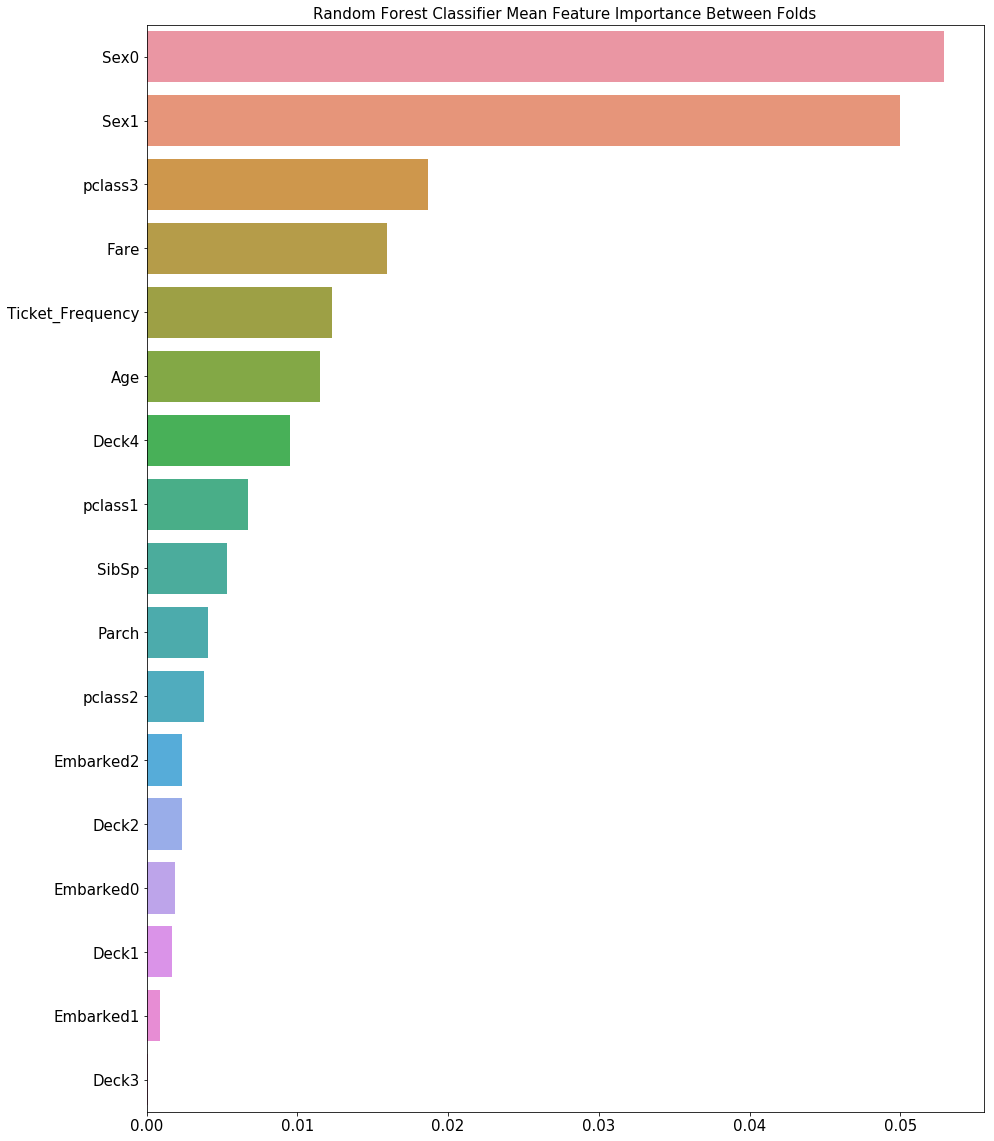

In [451]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()

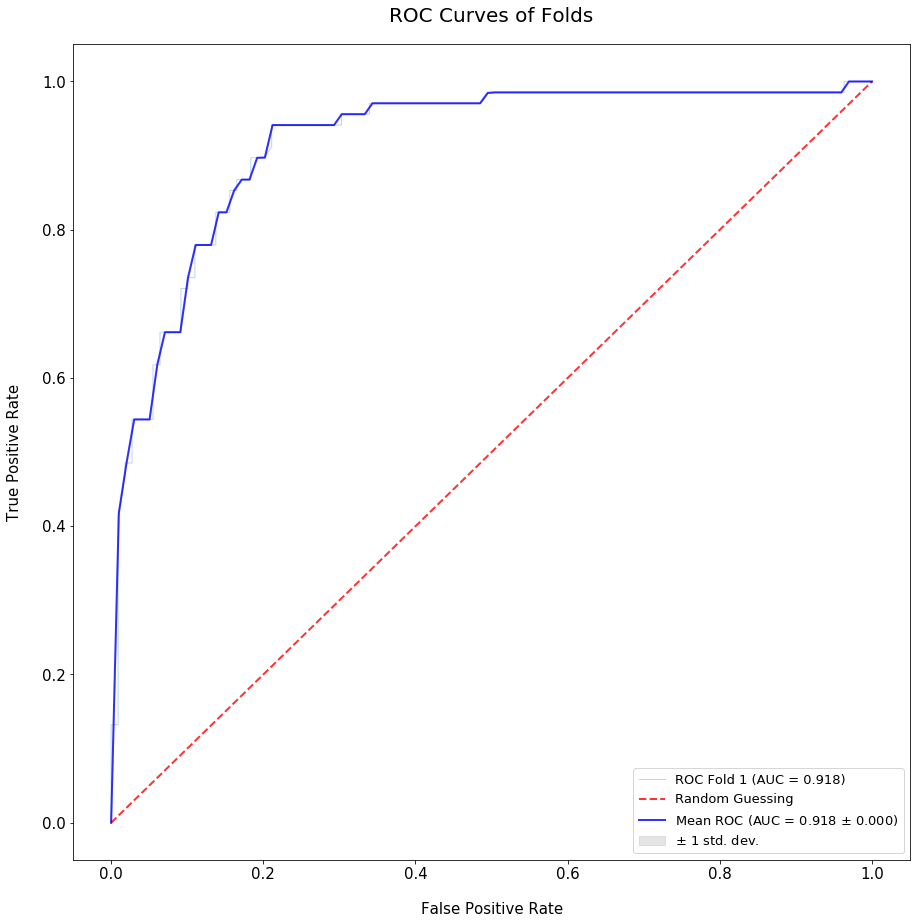

In [453]:
def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15))
    
    # Plotting ROC for each fold and computing AUC scores
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # Plotting ROC for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting the mean ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # Plotting the standard deviation around the mean ROC Curve
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})
    
    plt.show()

plot_roc_curve(fprs, tprs)

In [454]:
class_survived = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_survived].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_survived).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['pred'].astype(int)

In [456]:
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = all_data.loc[891:]['PassengerId']
submission_df['Survived'] = y_pred.values
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
896,897,0
897,898,0
898,899,0
899,900,0
900,901,0
